# Delivery: Linear Models (Part 2) - by Sindre Øyen

In this part 2 of the delivery, I will explore methods for using linear models to classify handwritten digits.

---

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [59]:
digits = load_digits()

*Visualizing the data of the first handwritten digit using matplotlib*

<Figure size 640x480 with 0 Axes>

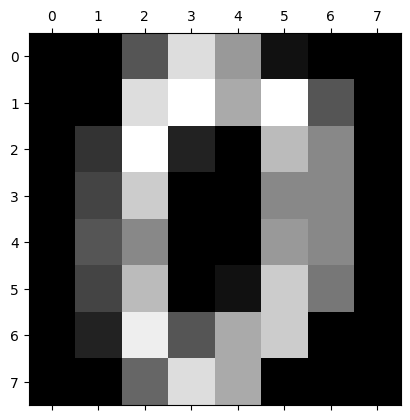

0


In [60]:
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 
print(digits.target[0])

### Exercise 6
Apply logistic regression to obtain a classifier for this multiclass problem. Below is the task description:

Algunas observaciones:

* Originalmente, en `digits.images` tenemos un array con 1797 arrays 8x8 (es decir, cada imagen viene en 64 pixeles distribuidos en 8 filas y 8 clolumnas). Para poder aplicar los clasificadores, cada imagen debe ser un vector de 64 componentes. Esto se consigue de manera sencilla con el método `reshape`de numpy. 
* Es necesario separar el conjunto de imágenes en entrenamiento y prueba. No olvidar hacerlo de manera estratificada (usando la opción `stratify`de `train_test_split`)
* Medir el rendimiento usando `score`. 

In [61]:
from numpy import reshape

In [158]:
# Reshape the image data to vectors of length 64
digits.images = [reshape(image, (64,)) for image in digits.images]
print(digits.images[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [187]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = \
train_test_split(digits.images, digits.target, test_size=0.25, random_state=22, stratify=digits.target)

Training a logistic regression model to classify the test data, based on the training data.

In [160]:
# Using logistic regression
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
logreg = LogisticRegression(C=0.4, max_iter=10000).fit(X_train, y_train)
print("Logistic regression training accuracy:", logreg.score(X_train, y_train))
print("Logistic regression test accuracy:", logreg.score(X_test, y_test))

Logistic regression training accuracy: 1.0
Logistic regression test accuracy: 0.9644444444444444


### Exercise 7
Having identified a well performing classifier, I will now analyze the data further to understand the inner workings even more. Under you will find the analysis points further elaborated:

- To analyze the classifier I will investigate the confusion matrix to understand which two digits are most commonly mistaken for one another. 

- I will extract one digit that has been correctly classified, and one that has been incorrectly classified. To understand more about these two digits, I will use the `predict_proba` to illustrate the numbers behind the classifications for each of them. 
- Furthermore, having identified the most commonly mistaken digits for the classifier, I will extract all the data for these two digits and create a data set with only them. 
- Lastly, I will use the data sets from these most commonly mistaken digits to create a *specialist* classifier, only trained to identify these two. With this classifier, as with all, I will attempt to adjust the parameters to ensure good performance.

In [145]:
from sklearn.metrics import confusion_matrix
import numpy as np

*Firstly, I will understand the confusion matrix with a detailed heatmap*

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 42  1  0  0  0  0  0  3  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  3  0  0  1  1]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  2]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  1]
 [ 0  2  0  0  0  0  0  1 40  0]
 [ 0  0  0  0  0  0  0  1  0 44]]


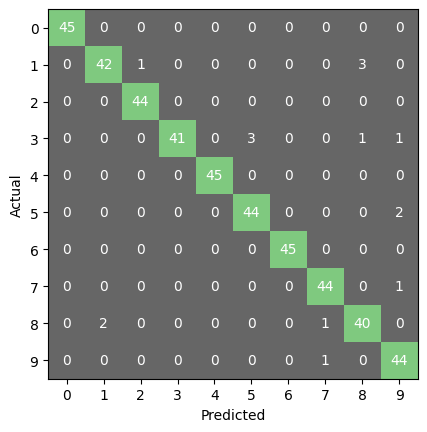

In [146]:
# Get the predictions for the test data
y_pred = logreg.predict(X_test)
labels = sorted(np.unique(digits.target))
print(labels)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

plt.imshow(conf_mat, cmap='Accent_r', interpolation='nearest')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add the numbers to the plot
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white')

plt.show()

From the depiction above, it is clear that the errors are quite spread. There is not a super clear trend here. However, three "1"s have been predicted to be an "8", and two "8" have been predicted to be a "1" - which is the most prevalent combination of digits that are getting confused for each other, and will thus be the focus for the specialized classifier.

Using `predict_proba` to better understand a case where the classifier misclassifies an image.

The first misclassified image is at index: 27
The predicted label for this image is: 8
The actual label for this image is: 1


<Figure size 640x480 with 0 Axes>

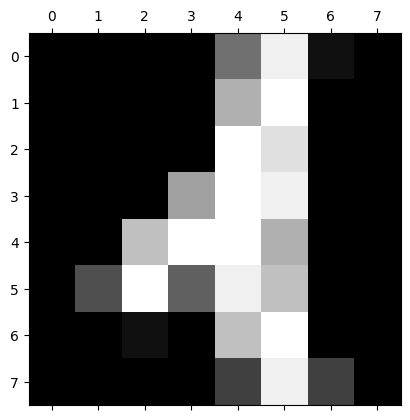

The probabilities for the misclassified image are: [4.07069026e-09 2.78532682e-01 9.37225783e-06 1.99690825e-03
 3.15748424e-02 3.96078677e-12 4.57215801e-04 1.63272171e-04
 6.87265699e-01 4.56386943e-09]


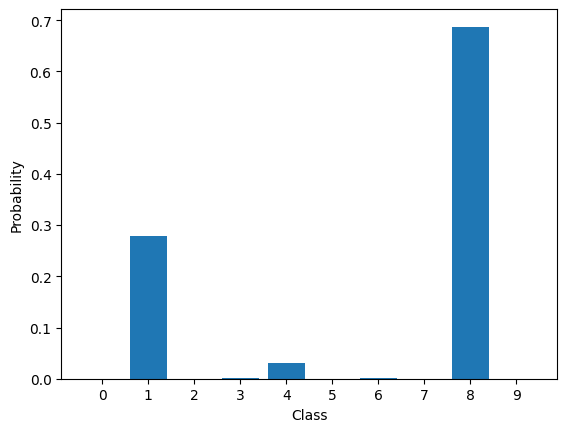

In [147]:
# Find the first misclassified image
misclassified = np.where(y_test != y_pred)[0][0]
print("The first misclassified image is at index:", misclassified)
print("The predicted label for this image is:", y_pred[misclassified])
print("The actual label for this image is:", y_test[misclassified])

# Plot the misclassified image
plt.gray()
plt.matshow(X_test[misclassified].reshape(8, 8))
plt.show()

# Find the probabilities for the misclassified image
probs = logreg.predict_proba(X_test[misclassified].reshape(1, -1))[0]
print("The probabilities for the misclassified image are:", probs)
# Plot the probabilities
plt.bar(np.arange(0, 10), probs)
plt.xticks(np.arange(0, 10), labels)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()

As one can see in this case, the probability distribution for this wrongly classified image is spread across different possible classifications. This resulted in the model predicting the digit to be an eight, when it actually was a one. As one can see in the depiction of the number, it is indeed not very clear - and this example illustrates well how the model is not very fit to these edge cases.

---

The first correctly classified image is at index: 0
The label for this image is: 2


<Figure size 640x480 with 0 Axes>

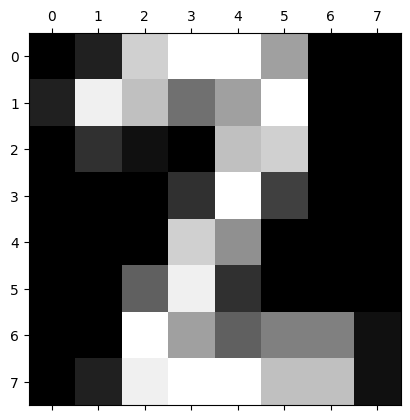

The probabilities for the correctly classified image are: [1.17968752e-14 3.03204551e-16 9.99985072e-01 1.49228967e-05
 2.28245871e-20 1.81507279e-14 3.58789227e-16 2.33756295e-12
 4.99136720e-09 2.01011941e-11]


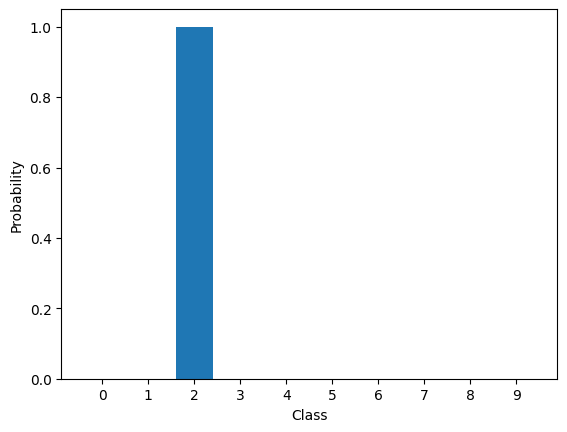

In [148]:
# Find the first correctly classified image
classified = np.where(y_test == y_pred)[0][0]
print("The first correctly classified image is at index:", classified)
print("The label for this image is:", y_pred[classified])

# Plot the image
plt.gray()
plt.matshow(X_test[classified].reshape(8, 8))
plt.show()

# Find the probabilities for the image
probs = logreg.predict_proba(X_test[classified].reshape(1, -1))[0]
print("The probabilities for the correctly classified image are:", probs)
# Plot the probabilities
plt.bar(np.arange(0, 10), probs)
plt.xticks(np.arange(0, 10), labels)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()

---
Lastly, for this task, I will direct the focus towards developing a specialized model that will focus mainly on differentiating between the most common confusion area for the above model; namely between 1 and 8.

Firstly we have to generate the new data sets

In [168]:
# Extracting the data and target for the 1s and 8s
ones_indices = np.where(digits.target == 1)[0]
eights_indices = np.where(digits.target == 8)[0]
indices = np.concatenate((ones_indices, eights_indices))

data = np.array([digits.images[i] for i in indices])
target = np.array([digits.target[i] for i in indices])

# Splitting the data into training and test sets
X_sp_train, X_sp_test, y_sp_train, y_sp_test = \
train_test_split(data, target, test_size=0.25, random_state=22, stratify=target)

Secondly, we train the model.

In [172]:
# Creating a logistic regression object
specializedLogreg = LogisticRegression(C=0.4, max_iter=10000).fit(X_sp_train, y_sp_train)

In [173]:
# Printing the accuracy scores
print("Logistic regression training accuracy:", specializedLogreg.score(X_sp_train, y_sp_train))
print("Logistic regression test accuracy:", specializedLogreg.score(X_sp_test, y_sp_test))

Logistic regression training accuracy: 1.0
Logistic regression test accuracy: 1.0


---
### Exercise 8 

Utilize SVC for the problem as well

In [301]:
from sklearn.svm import SVC

# Creating the SVC model
svc = SVC(kernel='poly', C=0.0099, gamma='auto').fit(X_train, y_train)

# Printing the accuracy scores
print("SVC training accuracy:", svc.score(X_train, y_train))
print("SVC test accuracy:", svc.score(X_test, y_test))

SVC training accuracy: 1.0
SVC test accuracy: 0.9911111111111112


In the above implementation I have created an implementation with support vector machines, with kernel, using sklearn's SVC classifier. The C param, as I have explained before, defines a level of regularization - with inverse strength. Meaning that a low C value can lead to low bias but high variance - which effectively means a risk of overfitting. As for this implementation, a lower and lower C value seems to generate a better score, until some threshold. 

I perceive this result as an indication that the model indeed is being more and more overfitted as the C value is decreased. Even though it may seem nice to get the test scores up, it may be better to compromise a little and have the C parameter somewhat in the middle of the scale. This is to reduce the likeliness of an overfitted model, which is especially important when working with something as subject to variation as handwriting.